In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import operator

In [2]:
def find_fnames(match):
    base = '/home/rldata/hilbert-embeddings/embeddings/diffusion-hilbert/'
    dirs = listdir(base)
    matched_dirs= [ d for d in dirs if match in d]
    matched_dirs = [ base + d +  "/iter-" + str(int(d.split('-')[4].lstrip('I')) * 100) + "/similarity_1.txt" for d in matched_dirs]
    sizes = [int(d.split('/')[6].split('-')[0].split('.')[1]) for d in matched_dirs]
    
    sorted_dirs = sorted(zip(matched_dirs, sizes), key=operator.itemgetter(1))
    return list(list(zip(*sorted_dirs))[0])

In [3]:
def get_data(fname): 
    ...:     data = [] 
    ...:     with open(fname) as csv_file: 
    ...:         csv_reader = csv.reader(csv_file, delimiter=',') 
    ...:         line_count = 0 
    ...:         for row in csv_reader: 
    ...:             if line_count == 12: 
    ...:                 break 
    ...:             if line_count == 0: 
    ...:                 test_names = row 
    ...:                 line_count += 1 
    ...:             else: 
    ...:                 data.append(row) 
    ...:                 line_count += 1 
    ...:     return test_names, data 

In [4]:
def print_table(match, isPrint=True, rounding=3):
    dirnames = find_fnames(match)
    all_mle = [get_data(d) for d in dirnames]
    dsnames = ['simlex999', 'rarewords', 'bakerverb143', 'men_dev',
          'radinskymturk', 'wordsim353_similarity', 'yangpowersverb130',
          'men_test', 'semeval17task2_test', 'wordsim353_relatedness',
          'simverb3500']
    dsnames_shortened = ['simlex', 'rarewords', 'baker', 'men-dev', 
                        'radins', 'word-sim', 'yang', 'men-test', 
                        'semeval', 'word-rel', 'simverb']
    lines = []
    allscores = []
    for j,dname in enumerate(dsnames):
        line = dsnames_shortened[j]
        scores= []
        for data in all_mle:
            cc_index = 0
            for i,t in enumerate(data[0]):
                if t == "covered-spearman":
                    cc_index = i

            for d in data[1]:
                if d[0] == dname:
                    score = round(float(d[cc_index]),rounding)
                    line += " & " + str(score) + " "
                    scores.append(score)
        lines.append(line + "\\\\\n")
        allscores.append(scores)
    if isPrint:
        print(
    """
        \\begin{table}[H]
    \centering
    \caption{}
    \\begin{tabularx}{\\textwidth}{X|X|X|X|X|X|X|X|X}
        test name & 1/8 & 1/32 & 1/128 & 1/512 & 1/2048 & 1/4096 & 1/8192 & 1/16384\\\\
        \hline
        """)
        for l in lines:
            print(l)
        print("""
              \end{tabularx}
              \end{table}""")
    return allscores


In [5]:
def print_diff_table(match1, match2, rounding=3):
    dsnames_shortened = ['simlex', 'rarewords', 'baker', 'men-dev', 
                    'radins', 'word-sim', 'yang', 'men-test', 
                    'semeval', 'word-rel', 'simverb']
    scores1 = print_table(match1, False)
    scores2 = print_table(match2, False)
    diff = np.array(scores1) - np.array(scores2)
        
    last_row = np.sum((diff < 0).astype(int), axis=0)
    lines = []
    for i,d in enumerate(diff):
        line = dsnames_shortened[i]
        for s in d:
            score = round(float(s),rounding)
            if score >= 0:
                line += " & " + str(score)
            else:
                line += " & \\textbf{" + str(score)+"}"
        lines.append(line)
        lines.append("\\\\\n")
    
    final_line = "\hline \n Bolded" 
    for l in last_row:
        final_line += " & " + str(l) + "/11" 
    final_line += "\\\\"
    lines.append(final_line)
        
    print(
    """
        \\begin{table}[H]
    \centering
    \caption{}
    \\begin{tabularx}{\\textwidth}{X|X|X|X|X|X|X|X|X}
        test name & 1/8 & 1/32 & 1/128 & 1/512 & 1/2048 & 1/4096 & 1/8192 & 1/16384\\\\
        \hline
        """)
    for l in lines:
            print(l)
    print("""
              \end{tabularx}
              \end{table}""")
    return diff

In [11]:
scoresd0= print_table('6w-mle')


        \begin{table}[H]
    \centering
    \caption{}
    \begin{tabularx}{\textwidth}{X|X|X|X|X|X|X|X|X}
        test name & 1/8 & 1/32 & 1/128 & 1/512 & 1/2048 & 1/4096 & 1/8192 & 1/16384\\
        \hline
        
simlex & 0.36  & 0.153 \\

rarewords & 0.68  & 0.342 \\

baker & 0.437  & 0.212 \\

men-dev & 0.711  & 0.415 \\

radins & 0.659  & 0.559 \\

word-sim & 0.724  & 0.535 \\

yang & 0.444  & 0.24 \\

men-test & 0.739  & 0.438 \\

semeval & 0.612  & 0.326 \\

word-rel & 0.531  & 0.373 \\

simverb & 0.222  & 0.073 \\


              \end{tabularx}
              \end{table}


In [12]:
scoresd1 = print_table('6w-diff1')


        \begin{table}[H]
    \centering
    \caption{}
    \begin{tabularx}{\textwidth}{X|X|X|X|X|X|X|X|X}
        test name & 1/8 & 1/32 & 1/128 & 1/512 & 1/2048 & 1/4096 & 1/8192 & 1/16384\\
        \hline
        
simlex & 0.365  & 0.153 \\

rarewords & 0.68  & 0.342 \\

baker & 0.444  & 0.212 \\

men-dev & 0.718  & 0.415 \\

radins & 0.658  & 0.559 \\

word-sim & 0.732  & 0.535 \\

yang & 0.445  & 0.24 \\

men-test & 0.747  & 0.438 \\

semeval & 0.617  & 0.326 \\

word-rel & 0.532  & 0.373 \\

simverb & 0.229  & 0.073 \\


              \end{tabularx}
              \end{table}


In [13]:
scoresd2 = print_table('6w-diff2')


        \begin{table}[H]
    \centering
    \caption{}
    \begin{tabularx}{\textwidth}{X|X|X|X|X|X|X|X|X}
        test name & 1/8 & 1/32 & 1/128 & 1/512 & 1/2048 & 1/4096 & 1/8192 & 1/16384\\
        \hline
        
simlex & 0.346  & 0.158 \\

rarewords & 0.677  & 0.439 \\

baker & 0.364  & 0.228 \\

men-dev & 0.725  & 0.494 \\

radins & 0.669  & 0.586 \\

word-sim & 0.736  & 0.592 \\

yang & 0.465  & 0.271 \\

men-test & 0.747  & 0.503 \\

semeval & 0.624  & 0.373 \\

word-rel & 0.545  & 0.389 \\

simverb & 0.205  & 0.078 \\


              \end{tabularx}
              \end{table}


In [14]:
scoresd3 = print_table('6w-diff3')


        \begin{table}[H]
    \centering
    \caption{}
    \begin{tabularx}{\textwidth}{X|X|X|X|X|X|X|X|X}
        test name & 1/8 & 1/32 & 1/128 & 1/512 & 1/2048 & 1/4096 & 1/8192 & 1/16384\\
        \hline
        
simlex & 0.335  & 0.161 \\

rarewords & 0.662  & 0.451 \\

baker & 0.338  & 0.277 \\

men-dev & 0.721  & 0.52 \\

radins & 0.668  & 0.618 \\

word-sim & 0.738  & 0.601 \\

yang & 0.456  & 0.242 \\

men-test & 0.742  & 0.538 \\

semeval & 0.619  & 0.37 \\

word-rel & 0.542  & 0.405 \\

simverb & 0.192  & 0.083 \\


              \end{tabularx}
              \end{table}


In [16]:
np.mean(scoresd0, axis=0)

array([0.55627273, 0.33327273])

In [17]:
np.mean(scoresd1, axis=0)

array([0.56063636, 0.33327273])

In [18]:
np.mean(scoresd2, axis=0)

array([0.55481818, 0.37372727])

In [19]:
np.mean(scoresd3, axis=0)

array([0.54663636, 0.38781818])

In [ ]:
np.mean(score)

In [29]:
np.mean(print_table('9w-mle'), axis=0)


        \begin{table}[H]
    \centering
    \caption{}
    \begin{tabularx}{\textwidth}{X|X|X|X|X|X|X|X|X}
        test name & 1/8 & 1/32 & 1/128 & 1/512 & 1/2048 & 1/4096 & 1/8192 & 1/16384\\
        \hline
        
simlex & 0.353  & 0.133 \\

rarewords & 0.663  & 0.334 \\

baker & 0.402  & 0.208 \\

men-dev & 0.716  & 0.497 \\

radins & 0.675  & 0.533 \\

word-sim & 0.715  & 0.533 \\

yang & 0.443  & 0.411 \\

men-test & 0.744  & 0.492 \\

semeval & 0.608  & 0.321 \\

word-rel & 0.548  & 0.375 \\

simverb & 0.214  & 0.085 \\


              \end{tabularx}
              \end{table}


array([0.55281818, 0.35654545])

In [43]:
mle_perc_drop = []
for s in mle_scores:
    mle_perc_drop.append((s[0] - s[-1])/s[0])

In [41]:
diff_dropoff = []
for s in diff_scores:
    diff_dropoff.append(s[0] - s[-1])

In [45]:
diff_perc_drop = []
for s in diff_scores:
    diff_perc_drop.append((s[0] - s[-1])/s[0])

In [42]:
diff_dropoff

[0.06500000000000003,
 0.331,
 0.15300000000000002,
 0.189,
 0.15799999999999997,
 0.136,
 0.063,
 0.132,
 0.18900000000000006,
 0.09700000000000003,
 0.063]

In [44]:
mle_perc_drop

[0.4261363636363636,
 0.4480337078651685,
 0.4809523809523809,
 0.19160839160839163,
 0.20444444444444446,
 0.30163043478260865,
 0.3835616438356164,
 0.20728291316526615,
 0.2864493996569468,
 0.31660231660231664,
 0.5336538461538461]

In [49]:
np.mean(diff_perc_drop)

0.33058829304446175

In [50]:
np.mean(mle_perc_drop)

0.34366871297303186

In [51]:
np.mean(diff_dropoff)

0.14327272727272725

In [52]:
np.mean(mle_dropoff)

0.17254545454545453

In [58]:
difference = np.array(mle_scores) - np.array(diff_scores)

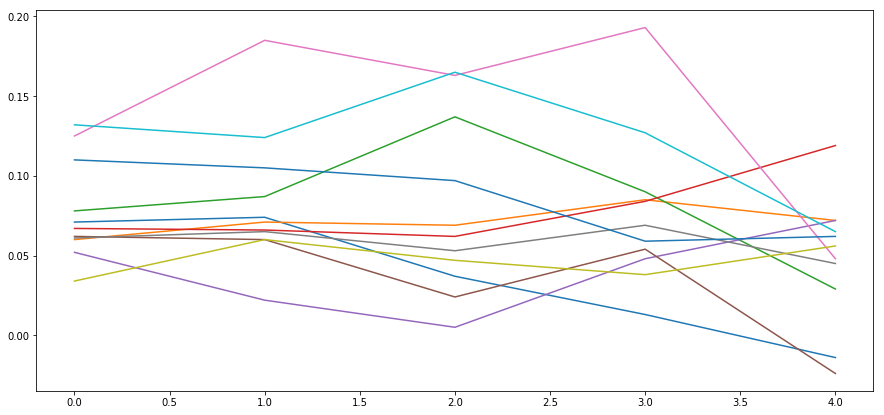

In [59]:
plt.figure(figsize=(15,7))
for d in difference:
    plt.plot(range(len(d)), d)

In [64]:
lines = []
for i,d in enumerate(difference):
    line = dsnames[i]
    for ds in d:
        line += "& " + str(round(ds, 3)) 
    lines.append(line + "\\\\")

In [65]:
for l in lines:
    print(l)

simlex999& 0.071& 0.074& 0.037& 0.013& -0.014\\
rarewords& 0.06& 0.071& 0.069& 0.085& 0.072\\
bakerverb143& 0.078& 0.087& 0.137& 0.09& 0.029\\
men_dev& 0.067& 0.066& 0.062& 0.084& 0.119\\
radinskymturk& 0.052& 0.022& 0.005& 0.048& 0.072\\
wordsim353_similarity& 0.062& 0.06& 0.024& 0.054& -0.024\\
yangpowersverb130& 0.125& 0.185& 0.163& 0.193& 0.048\\
men_test& 0.061& 0.065& 0.053& 0.069& 0.045\\
semeval17task2_test& 0.034& 0.06& 0.047& 0.038& 0.056\\
wordsim353_relatedness& 0.132& 0.124& 0.165& 0.127& 0.065\\
simverb3500& 0.11& 0.105& 0.097& 0.059& 0.062\\
